## <center>**Détection du Cancer du Sein par Régression Logistique Implémentée from Scratch**</center>

#### **Objectif:**
Notre but est de concevoir un modèle de machine learning de classification capable de prédire si une tumeur est *bénigne* ou *maligne* à partir de mesures médicales.\
Contrairement à un modèle construit avec des packages préconçus, nous allons le développer à partir de zéro, en n'utilisant que les packages suivants : **NumPy**, **Matplotlib** et **Pandas**.\
Pour cela, nous utiliserons le jeu de données "Breast Cancer" disponible sur le site : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.

#### **Conception du modèle :**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Initialisation du modèle de régression logistique
class LogisticRegressionModel:
    def __init__(self, learning_rate=0.01, nbre_iterations=1000):
        self.learning_rate = learning_rate
        self.nbre_iterations = nbre_iterations
        self.poids = None
       

    # Fonction d'activation sigmoïde
    def sigmoïde(self, z):
        return 1 / (1 + np.exp(-z))

    # Entraînement du modèle
    def entrainement(self, X, y):
        X_lignes, X_colones = X.shape
        self.poids = np.zeros(X_colones)

        # Descente de gradient
        for i in range(self.nbre_iterations):
            # Prédictions
            modèle_lineaire = np.dot(X, self.poids)
            y_prédit = self.sigmoïde(modèle_lineaire)

            # Calcul des gradients
            dw = (1 / X_lignes) * np.dot(X.T, (y_prédit - y))
            # Mise à jour des poids
            self.poids -= self.learning_rate * dw
           

    # Prédiction
    def prédiction(self, X):
        modèle_lineaire = np.dot(X, self.poids) 
        y_prédit = self.sigmoïde(modèle_lineaire)
        y_prédit_classe = [1 if i > 0.3 else 0 for i in y_prédit]
        return np.array(y_prédit_classe)


#### **Application de notre modèle créé sur nos données:**

**Importation des données**

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data["data"]
y = data["target"]
X_train = X[:455] 
y_train = y[:455]
X_test = X[455:]
y_test = y[455:]

**Normalisation de nos données**

In [5]:
# Fonction de normalisation de données
def normalisation(X, epsilon=1e-8):
    ecart_type = np.std(X, axis=0)
    return (X - np.mean(X, axis=0)) / (ecart_type + epsilon)

# Normalisation des données
X_train = normalisation(X_train)
X_test = normalisation(X_test)


**Entrainement du modèle**

In [6]:
# Initialisation et entraînement du modèle
model = LogisticRegressionModel(learning_rate=0.001, nbre_iterations=10000)
model.entrainement(X_train, y_train)

#### **Evaluation du modèle:**

Accuracy: 0.98
Précision: 0.99
Rappel: 0.99
Score F1: 0.99

Matrice de confusion:
               Prédit Negatif  Prédit Positif
Réel Negatif              25               1
Réel Positif               1              87


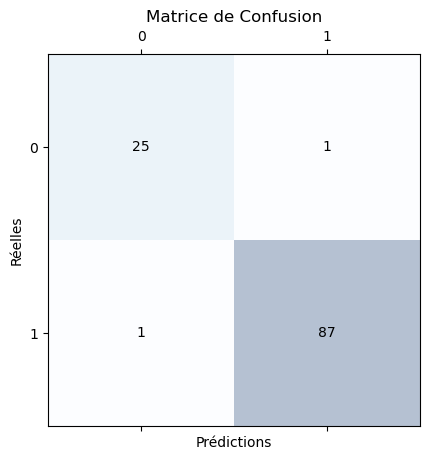

In [7]:
# Fonction pour calculer les métriques de performance
def evaluation_modèle(y_1, y_2):
    # Calcul de la matrice de confusion
    Réel_positif = np.sum((y_1 == 1) & (y_2 == 1))
    Réel_négatif = np.sum((y_1 == 0) & (y_2 == 0))
    Faux_positif = np.sum((y_1 == 0) & (y_2 == 1))
    Faux_négatif = np.sum((y_1 == 1) & (y_2 == 0))

    # Calcul des métriques
    accuracy = (Réel_positif + Réel_négatif) / (Réel_positif + Réel_négatif + Faux_positif + Faux_négatif)
    précision = Réel_positif / (Réel_positif + Faux_positif) if (Réel_positif + Faux_positif) > 0 else 0
    rappel = Réel_positif / (Réel_positif + Faux_négatif) if (Réel_positif + Faux_négatif) > 0 else 0
    f1_score = 2 * (précision * rappel) / (précision + rappel) if (précision + rappel) > 0 else 0

    # Affichage des résultats
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Précision: {précision:.2f}')
    print(f'Rappel: {rappel:.2f}')
    print(f'Score F1: {f1_score:.2f}')
    
    # Affichage de la matrice de confusion
    confusion_matrix = pd.DataFrame([[Réel_négatif, Faux_positif], [Faux_négatif, Réel_positif]], 
                                    index=["Réel Negatif", "Réel Positif"], 
                                    columns=["Prédit Negatif", "Prédit Positif"])
    print("\nMatrice de confusion:\n", confusion_matrix)

    # Visualisation de la matrice de confusion
    plt.matshow(confusion_matrix, cmap="Blues", alpha=0.3)
    for i in range(2):
        for j in range(2):
            plt.text(x=j, y=i, s=confusion_matrix.iloc[i, j], ha='center', va='center')
    plt.xlabel("Prédictions")
    plt.ylabel("Réelles")
    plt.title("Matrice de Confusion")
    plt.show()

# Utilisation de la fonction d'évaluation sur les données de validation
y_prédit = model.prédiction(X_test)
evaluation_modèle(y_test, y_prédit)
